# HW 0 - Intro to Pandas
Credit: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Object Creation


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.056100,-1.476868,-0.295436,1.166565
2013-01-02,-1.121601,0.121268,-0.425511,0.824180
2013-01-03,0.767924,-1.546357,-0.603759,2.138908
2013-01-04,0.956205,1.249681,0.080045,-0.310805
2013-01-05,-0.964825,0.302828,-1.094715,-0.617747
2013-01-06,0.000513,1.469778,1.011251,-0.198495


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [6]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

View the top and bottom rows of the frame:

In [8]:
df.head()

,A,B,C,D
2013-01-01,-1.056100,-1.476868,-0.295436,1.166565
2013-01-02,-1.121601,0.121268,-0.425511,0.824180
2013-01-03,0.767924,-1.546357,-0.603759,2.138908
2013-01-04,0.956205,1.249681,0.080045,-0.310805
2013-01-05,-0.964825,0.302828,-1.094715,-0.617747


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,0.956205,1.249681,0.080045,-0.310805
2013-01-05,-0.964825,0.302828,-1.094715,-0.617747
2013-01-06,0.000513,1.469778,1.011251,-0.198495


Display the index, columns:

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [12]:
df.values

array([[-1.05610049e+00, -1.47686848e+00, -2.95436136e-01,
         1.16656466e+00],
       [-1.12160062e+00,  1.21268178e-01, -4.25511032e-01,
         8.24179787e-01],
       [ 7.67924032e-01, -1.54635681e+00, -6.03758588e-01,
         2.13890800e+00],
       [ 9.56204814e-01,  1.24968056e+00,  8.00451627e-02,
        -3.10804594e-01],
       [-9.64824934e-01,  3.02827964e-01, -1.09471513e+00,
        -6.17746952e-01],
       [ 5.13010757e-04,  1.46977787e+00,  1.01125091e+00,
        -1.98495321e-01]])

In [13]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

.describe( ) shows a quick statistic summary of your data:

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.236314,0.020055,-0.221354,0.500434
std,0.945853,1.296017,0.716424,1.061139
min,-1.121601,-1.546357,-1.094715,-0.617747
25%,-1.033282,-1.077334,-0.559197,-0.282727
50%,-0.482156,0.212048,-0.360474,0.312842
75%,0.576071,1.012967,-0.013825,1.080968
max,0.956205,1.469778,1.011251,2.138908


Transposing your data:

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.056100,-1.121601,0.767924,0.956205,-0.964825,0.000513
B,-1.476868,0.121268,-1.546357,1.249681,0.302828,1.469778
C,-0.295436,-0.425511,-0.603759,0.080045,-1.094715,1.011251
D,1.166565,0.824180,2.138908,-0.310805,-0.617747,-0.198495


Sorting by an axis:

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.166565,-0.295436,-1.476868,-1.056100
2013-01-02,0.824180,-0.425511,0.121268,-1.121601
2013-01-03,2.138908,-0.603759,-1.546357,0.767924
2013-01-04,-0.310805,0.080045,1.249681,0.956205
2013-01-05,-0.617747,-1.094715,0.302828,-0.964825
2013-01-06,-0.198495,1.011251,1.469778,0.000513


Sorting by values:

In [17]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.767924,-1.546357,-0.603759,2.138908
2013-01-01,-1.056100,-1.476868,-0.295436,1.166565
2013-01-02,-1.121601,0.121268,-0.425511,0.824180
2013-01-05,-0.964825,0.302828,-1.094715,-0.617747
2013-01-04,0.956205,1.249681,0.080045,-0.310805
2013-01-06,0.000513,1.469778,1.011251,-0.198495


## Selection

### Getting 

Selecting a single column, which yields a Series, equivalent to df.A:

In [18]:
df['A']

2013-01-01   -1.056100
2013-01-02   -1.121601
2013-01-03    0.767924
2013-01-04    0.956205
2013-01-05   -0.964825
2013-01-06    0.000513
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,-1.056100,-1.476868,-0.295436,1.166565
2013-01-02,-1.121601,0.121268,-0.425511,0.824180
2013-01-03,0.767924,-1.546357,-0.603759,2.138908


In [20]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.121601,0.121268,-0.425511,0.824180
2013-01-03,0.767924,-1.546357,-0.603759,2.138908
2013-01-04,0.956205,1.249681,0.080045,-0.310805


### Selection by label

For getting a cross section using a label:

In [21]:
df.loc[dates[0]]

A   -1.056100
B   -1.476868
C   -0.295436
D    1.166565
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [22]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.056100,-1.476868
2013-01-02,-1.121601,0.121268
2013-01-03,0.767924,-1.546357
2013-01-04,0.956205,1.249681
2013-01-05,-0.964825,0.302828
2013-01-06,0.000513,1.469778


Showing label slicing, both endpoints are included:

In [23]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.121601,0.121268
2013-01-03,0.767924,-1.546357
2013-01-04,0.956205,1.249681


Reduction in the dimensions of the returned object:

In [24]:
df.loc['20130102', ['A', 'B']]

A   -1.121601
B    0.121268
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [25]:
df.loc[dates[0], 'A']

-1.0561004945487016

For getting fast access to a scalar (equivalent to the prior method):

In [26]:
df.at[dates[0], 'A']

-1.0561004945487016

### Selection by position

Select via the position of the passed integers:

In [27]:
df.iloc[3]

A    0.956205
B    1.249681
C    0.080045
D   -0.310805
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [28]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.956205,1.249681
2013-01-05,-0.964825,0.302828


By lists of integer position locations, similar to the numpy/python style:

In [29]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.121601,-0.425511
2013-01-03,0.767924,-0.603759
2013-01-05,-0.964825,-1.094715


For slicing rows explicitly:

In [30]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.121601,0.121268,-0.425511,0.824180
2013-01-03,0.767924,-1.546357,-0.603759,2.138908


For slicing columns explicitly:

In [31]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.476868,-0.295436
2013-01-02,0.121268,-0.425511
2013-01-03,-1.546357,-0.603759
2013-01-04,1.249681,0.080045
2013-01-05,0.302828,-1.094715
2013-01-06,1.469778,1.011251


For getting a value explicitly:

In [32]:
df.iloc[1, 1]

0.12126817754342496

For getting fast access to a scalar (equivalent to the prior method):

In [33]:
df.iat[1, 1]

0.12126817754342496

### Boolean Indexing

Selecting values from a DataFrame where a boolean condition is met.

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,1.166565
2013-01-02,NaN,0.121268,NaN,0.824180
2013-01-03,0.767924,NaN,NaN,2.138908
2013-01-04,0.956205,1.249681,0.080045,NaN
2013-01-05,NaN,0.302828,NaN,NaN
2013-01-06,0.000513,1.469778,1.011251,NaN


Using the isin() method for filtering:

In [35]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.056100,-1.476868,-0.295436,1.166565,one
2013-01-02,-1.121601,0.121268,-0.425511,0.824180,one
2013-01-03,0.767924,-1.546357,-0.603759,2.138908,two
2013-01-04,0.956205,1.249681,0.080045,-0.310805,three
2013-01-05,-0.964825,0.302828,-1.094715,-0.617747,four
2013-01-06,0.000513,1.469778,1.011251,-0.198495,three


In [36]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.767924,-1.546357,-0.603759,2.138908,two
2013-01-05,-0.964825,0.302828,-1.094715,-0.617747,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['F'] = s1

Setting values by label:

In [40]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [41]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [42]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [43]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.295436,5,NaN
2013-01-02,-1.121601,0.121268,-0.425511,5,1.0
2013-01-03,0.767924,-1.546357,-0.603759,5,2.0
2013-01-04,0.956205,1.249681,0.080045,5,3.0
2013-01-05,-0.964825,0.302828,-1.094715,5,4.0
2013-01-06,0.000513,1.469778,1.011251,5,5.0


A where operation with setting.

In [44]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.295436,-5,NaN
2013-01-02,-1.121601,-0.121268,-0.425511,-5,-1.0
2013-01-03,-0.767924,-1.546357,-0.603759,-5,-2.0
2013-01-04,-0.956205,-1.249681,-0.080045,-5,-3.0
2013-01-05,-0.964825,-0.302828,-1.094715,-5,-4.0
2013-01-06,-0.000513,-1.469778,-1.011251,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.295436,5,NaN,1.0
2013-01-02,-1.121601,0.121268,-0.425511,5,1.0,1.0
2013-01-03,0.767924,-1.546357,-0.603759,5,2.0,NaN
2013-01-04,0.956205,1.249681,0.080045,5,3.0,NaN


** To drop any rows that have missing data. **

In [46]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,-1.121601,0.121268,-0.425511,5,1.0,1.0


Filling missing data.

In [47]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.295436,5,5.0,1.0
2013-01-02,-1.121601,0.121268,-0.425511,5,1.0,1.0
2013-01-03,0.767924,-1.546357,-0.603759,5,2.0,5.0
2013-01-04,0.956205,1.249681,0.080045,5,3.0,5.0


To get the boolean mask where values are nan

In [48]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Performing a descriptive statistic:

In [49]:
df.mean()

A   -0.060297
B    0.266200
C   -0.221354
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [50]:
df.mean(1)

2013-01-01    1.176141
2013-01-02    0.914831
2013-01-03    1.123562
2013-01-04    2.057186
2013-01-05    1.448658
2013-01-06    2.496308
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [52]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.232076,-2.546357,-1.603759,4.0,1.0
2013-01-04,-2.043795,-1.750319,-2.919955,2.0,0.0
2013-01-05,-5.964825,-4.697172,-6.094715,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 

Applying functions to the data:

In [53]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.295436,5,NaN
2013-01-02,-1.121601,0.121268,-0.720947,10,1.0
2013-01-03,-0.353677,-1.425089,-1.324706,15,3.0
2013-01-04,0.602528,-0.175408,-1.244661,20,6.0
2013-01-05,-0.362297,0.127420,-2.339376,25,10.0
2013-01-06,-0.361784,1.597198,-1.328125,30,15.0


### Histrogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    0
3    3
4    5
5    2
6    3
7    1
8    5
9    5
dtype: int64

In [55]:
s.value_counts()

5    3
3    2
1    2
0    2
2    1
dtype: int64

### String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [56]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [57]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.900760,-0.259718,0.428272,-0.760726
1,0.862023,-2.158267,0.103809,-0.396985
2,0.759961,-0.973911,0.715707,-0.594566
3,0.127674,0.003954,-0.422543,-0.375582
4,0.964910,2.627521,0.636512,-0.356865
5,-1.067098,0.095595,1.182397,-1.015380
6,-1.955458,0.214194,0.344601,-0.157795
7,-1.571254,-0.588933,-1.051022,1.081947
8,-0.183701,0.037992,0.228459,-0.464717
9,-0.390389,-1.373987,-0.004915,0.429512


In [59]:
# Break it into pieces
pieces = [df[0:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.900760,-0.259718,0.428272,-0.760726
1,0.862023,-2.158267,0.103809,-0.396985
2,0.759961,-0.973911,0.715707,-0.594566
7,-1.571254,-0.588933,-1.051022,1.081947
8,-0.183701,0.037992,0.228459,-0.464717
9,-0.390389,-1.373987,-0.004915,0.429512


### Join

SQL style merges

In [60]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another Example:

In [61]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe. 

In [62]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.391050,-0.144900,-0.242960,0.961968
1,-0.161318,0.149084,-0.816692,1.081439
2,-0.161265,0.874178,0.605855,0.520845
3,1.355729,-0.174194,-2.494256,-0.947909
4,-0.362028,0.442370,-0.663817,-0.981738
5,-0.535374,-0.023833,1.412833,1.378778
6,0.809874,-0.225264,-0.697647,0.488746
7,0.313075,0.890311,-1.415258,1.226300


In [63]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.391050,-0.144900,-0.242960,0.961968
1,-0.161318,0.149084,-0.816692,1.081439
2,-0.161265,0.874178,0.605855,0.520845
3,1.355729,-0.174194,-2.494256,-0.947909
4,-0.362028,0.442370,-0.663817,-0.981738
5,-0.535374,-0.023833,1.412833,1.378778
6,0.809874,-0.225264,-0.697647,0.488746
7,0.313075,0.890311,-1.415258,1.226300
8,1.355729,-0.174194,-2.494256,-0.947909


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [64]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.454244,-0.829323
1,bar,one,0.101498,0.040118
2,foo,two,1.061406,-0.066974
3,bar,three,-0.354196,-0.953839
4,foo,two,-0.472186,1.744688
5,bar,two,0.770577,1.004619
6,foo,one,0.183964,-2.351791
7,foo,three,0.793412,-0.900062


Grouping and then applying the sum() function to the resulting groups.

In [65]:
df.groupby('A').sum()

,C,D
A,,
bar,0.517879,0.090898
foo,1.112352,-2.403462


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [66]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.101498  0.040118
    three -0.354196 -0.953839
    two    0.770577  1.004619
foo one   -0.270280 -3.181114
    three  0.793412 -0.900062
    two    0.589220  1.677714

## Plotting

<AxesSubplot:>

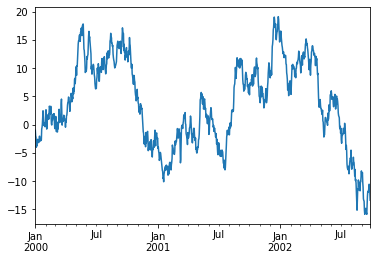

In [67]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

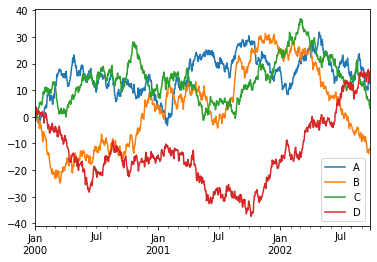

In [68]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()

## Getting data in/out

### CSV

In [69]:
df.to_csv('foo.csv')

In [70]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.297515,0.618083,1.148721,0.363292
1,2000-01-02,1.410537,0.210274,0.519842,1.116732
2,2000-01-03,0.902020,-0.380802,-0.482574,0.639611
3,2000-01-04,0.052136,-0.548020,-0.737682,1.478004
4,2000-01-05,-0.380147,1.053637,-0.314097,3.582150
